In [1]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

%matplotlib inline
mpl.style.use(['ggplot'])


In [3]:
req = pd.read_csv('datasets_596958_1073629_Placement_Data_Full_Class (1).csv')

pd.set_option('display.max.columns', None)

In [4]:
req.shape

(215, 14)

In [5]:
req

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,250000
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000


In [6]:
req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  salary          215 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 23.6+ KB


In [8]:
req.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,250000
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,425000
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,250000
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,250000
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,252000
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,231000
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,270000


In [9]:
req.tail(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
205,206,M,61.00,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,No,62.00,Mkt&Fin,56.81,250000
206,207,M,41.00,Central,42.0,Central,Science,60.0,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,270000
207,208,M,83.33,Central,78.0,Others,Commerce,61.0,Comm&Mgmt,Yes,88.56,Mkt&Fin,71.55,300000
208,209,F,43.00,Central,60.0,Others,Science,65.0,Comm&Mgmt,No,92.66,Mkt&HR,62.92,270000
209,210,M,62.00,Central,72.0,Central,Commerce,65.0,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,216000
210,211,M,80.60,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,400000
211,212,M,58.00,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.00,Mkt&Fin,53.62,275000
212,213,M,67.00,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.00,Mkt&Fin,69.72,295000
213,214,F,74.00,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.00,Mkt&HR,60.23,204000
214,215,M,62.00,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.00,Mkt&HR,60.22,270000


In [13]:
req.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,282562.790698
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,78022.190179
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,270000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [18]:
req.columns.values

array(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation',
       'mba_p', 'salary'], dtype=object)

In [22]:
req.drop(['workex', 'hsc_b', 'ssc_b'], axis=1, inplace=True)

In [23]:
req.head()

,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,salary
0,1,M,67.00,91.00,Commerce,58.00,Sci&Tech,55.0,Mkt&HR,58.80,270000
1,2,M,79.33,78.33,Science,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,200000
2,3,M,65.00,68.00,Arts,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,250000
3,4,M,56.00,52.00,Science,52.00,Sci&Tech,66.0,Mkt&HR,59.43,250000
4,5,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,96.8,Mkt&Fin,55.50,425000


In [24]:
req.rename(columns={'degree_t' : 'Major', 'hsc_s' : 'Cluster', 'specialisation' : 'ability'}, inplace=True)

In [25]:
req.head()

,sl_no,gender,ssc_p,hsc_p,Cluster,degree_p,Major,etest_p,ability,mba_p,salary
0,1,M,67.00,91.00,Commerce,58.00,Sci&Tech,55.0,Mkt&HR,58.80,270000
1,2,M,79.33,78.33,Science,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,200000
2,3,M,65.00,68.00,Arts,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,250000
3,4,M,56.00,52.00,Science,52.00,Sci&Tech,66.0,Mkt&HR,59.43,250000
4,5,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,96.8,Mkt&Fin,55.50,425000


In [26]:
req.columns

Index(['sl_no', 'gender', 'ssc_p', 'hsc_p', 'Cluster', 'degree_p', 'Major',
       'etest_p', 'ability', 'mba_p', 'salary'],
      dtype='object')

In [27]:
req.head(10)

,sl_no,gender,ssc_p,hsc_p,Cluster,degree_p,Major,etest_p,ability,mba_p,salary
0,1,M,67.00,91.00,Commerce,58.00,Sci&Tech,55.00,Mkt&HR,58.80,270000
1,2,M,79.33,78.33,Science,77.48,Sci&Tech,86.50,Mkt&Fin,66.28,200000
2,3,M,65.00,68.00,Arts,64.00,Comm&Mgmt,75.00,Mkt&Fin,57.80,250000
3,4,M,56.00,52.00,Science,52.00,Sci&Tech,66.00,Mkt&HR,59.43,250000
4,5,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,96.80,Mkt&Fin,55.50,425000
5,6,M,55.00,49.80,Science,67.25,Sci&Tech,55.00,Mkt&Fin,51.58,250000
6,7,F,46.00,49.20,Commerce,79.00,Comm&Mgmt,74.28,Mkt&Fin,53.29,250000
7,8,M,82.00,64.00,Science,66.00,Sci&Tech,67.00,Mkt&Fin,62.14,252000
8,9,M,73.00,79.00,Commerce,72.00,Comm&Mgmt,91.34,Mkt&Fin,61.29,231000
9,10,M,58.00,70.00,Commerce,61.00,Comm&Mgmt,54.00,Mkt&Fin,52.21,270000


In [28]:
req.tail(10)

,sl_no,gender,ssc_p,hsc_p,Cluster,degree_p,Major,etest_p,ability,mba_p,salary
205,206,M,61.00,62.0,Commerce,65.0,Comm&Mgmt,62.00,Mkt&Fin,56.81,250000
206,207,M,41.00,42.0,Science,60.0,Comm&Mgmt,97.00,Mkt&Fin,53.39,270000
207,208,M,83.33,78.0,Commerce,61.0,Comm&Mgmt,88.56,Mkt&Fin,71.55,300000
208,209,F,43.00,60.0,Science,65.0,Comm&Mgmt,92.66,Mkt&HR,62.92,270000
209,210,M,62.00,72.0,Commerce,65.0,Comm&Mgmt,67.00,Mkt&Fin,56.49,216000
210,211,M,80.60,82.0,Commerce,77.6,Comm&Mgmt,91.00,Mkt&Fin,74.49,400000
211,212,M,58.00,60.0,Science,72.0,Sci&Tech,74.00,Mkt&Fin,53.62,275000
212,213,M,67.00,67.0,Commerce,73.0,Comm&Mgmt,59.00,Mkt&Fin,69.72,295000
213,214,F,74.00,66.0,Commerce,58.0,Comm&Mgmt,70.00,Mkt&HR,60.23,204000
214,215,M,62.00,58.0,Science,53.0,Comm&Mgmt,89.00,Mkt&HR,60.22,270000


In [29]:
req.isnull().sum()

sl_no       0
gender      0
ssc_p       0
hsc_p       0
Cluster     0
degree_p    0
Major       0
etest_p     0
ability     0
mba_p       0
salary      0
dtype: int64

In [56]:
req[['gender', 'ability']]

,gender,ability
Major,,
Sci&Tech,M,Mkt&HR
Sci&Tech,M,Mkt&Fin
Comm&Mgmt,M,Mkt&Fin
Sci&Tech,M,Mkt&HR
Comm&Mgmt,M,Mkt&Fin
...,...,...
Comm&Mgmt,M,Mkt&Fin
Sci&Tech,M,Mkt&Fin
Comm&Mgmt,M,Mkt&Fin


In [31]:
req.shape

(215, 11)

In [32]:
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.1.3


In [33]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [39]:
req.set_index('Major', inplace=True)

In [42]:
req.head(10)

,sl_no,gender,ssc_p,hsc_p,Cluster,degree_p,etest_p,ability,mba_p,salary
Major,,,,,,,,,,
Sci&Tech,1,M,67.00,91.00,Commerce,58.00,55.00,Mkt&HR,58.80,270000
Sci&Tech,2,M,79.33,78.33,Science,77.48,86.50,Mkt&Fin,66.28,200000
Comm&Mgmt,3,M,65.00,68.00,Arts,64.00,75.00,Mkt&Fin,57.80,250000
Sci&Tech,4,M,56.00,52.00,Science,52.00,66.00,Mkt&HR,59.43,250000
Comm&Mgmt,5,M,85.80,73.60,Commerce,73.30,96.80,Mkt&Fin,55.50,425000
Sci&Tech,6,M,55.00,49.80,Science,67.25,55.00,Mkt&Fin,51.58,250000
Comm&Mgmt,7,F,46.00,49.20,Commerce,79.00,74.28,Mkt&Fin,53.29,250000
Sci&Tech,8,M,82.00,64.00,Science,66.00,67.00,Mkt&Fin,62.14,252000
Comm&Mgmt,9,M,73.00,79.00,Commerce,72.00,91.34,Mkt&Fin,61.29,231000


In [40]:
mpl.style.use(['ggplot'])

In [48]:
ST = req.loc['Sci&Tech', 'salary']

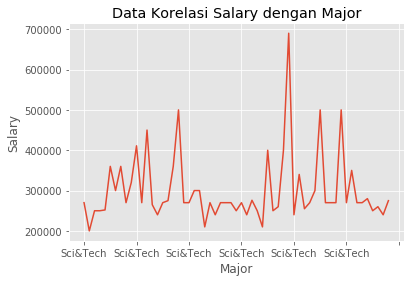

In [51]:
ST.plot(kind='line')

plt.title('Data Korelasi Salary dengan Major')
plt.ylabel('Salary')
plt.xlabel('Major')

plt.show()

In [57]:
req.set_index('Cluster', inplace=True)

In [58]:
req.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,ability,mba_p,salary
Cluster,,,,,,,,,
Commerce,1,M,67.00,91.00,58.00,55.0,Mkt&HR,58.80,270000
Science,2,M,79.33,78.33,77.48,86.5,Mkt&Fin,66.28,200000
Arts,3,M,65.00,68.00,64.00,75.0,Mkt&Fin,57.80,250000
Science,4,M,56.00,52.00,52.00,66.0,Mkt&HR,59.43,250000
Commerce,5,M,85.80,73.60,73.30,96.8,Mkt&Fin,55.50,425000


In [63]:
req_top3 = req['salary'].head(3)

Text(0.5, 1.0, 'Top 3 Salary by Major')

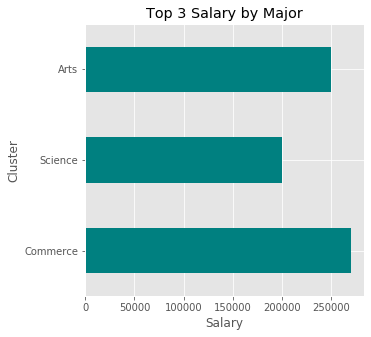

In [65]:
req_top3.plot(kind='barh', figsize=(5, 5), color='teal')

plt.xlabel('Salary')
plt.title('Top 3 Salary by Major')

In [66]:
req1 = req.groupby('Cluster').sum()
req1

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Cluster,,,,,,,
Arts,1231,640.00,690.20,676.23,746.13,686.23,2842000
Commerce,12041,7487.78,7796.90,7481.92,8116.46,7006.56,31866000
Science,9948,6342.45,5774.53,6111.44,6639.03,5697.02,26043000


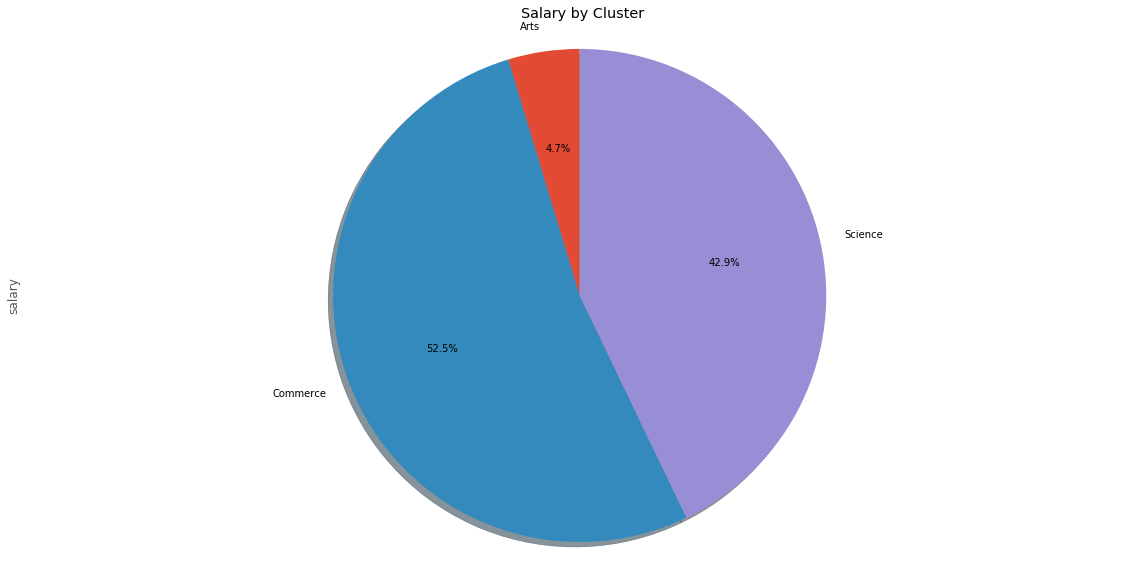

In [71]:
req1['salary'].plot(kind='pie',
                           figsize=(20,10),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True
                           )

plt.title('Salary by Cluster')
plt.axis('equal')

plt.show()